In [1]:
%matplotlib inline
import gym
import os
import scipy
import sys
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
sys.path.append('..')
import algorithms

In [2]:
# Method to run environment consecutively! 
# Make sure to run this cell
def run_environment_greedy(env, Q):
    state = env.reset()
    while(True):
        clear_output()
        print('Current State: {}'.format(state))
        action = np.argmax(Q[state])
        env.render()
        print('Greedy action: {}'.format(action))
        state, reward, done, _ = env.step(action)
        raw_input("Press Enter to continue...")
        if done:
            break
    clear_output()
    print('Current State: {}'.format(state))
    env.render()
    print('Finished')

# Cliff Walking

In [51]:
env = gym.make('CliffWalking-v0')

In [52]:
Q, sum_rewards = algorithms.sarsa(env, alpha=.3, num_episodes=400)

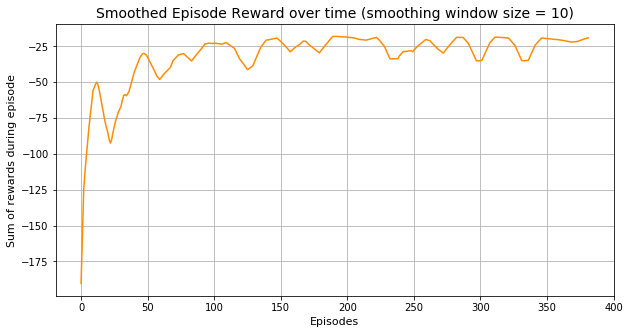

In [54]:
sum_rewards = np.convolve(sum_rewards, np.ones((10,))/10, mode='valid')
plt.figure(figsize=(10,5))
plt.title('Smoothed Episode Reward over time (smoothing window size = 10)', fontsize=14)
plt.xlabel('Episodes', fontsize=11)
plt.ylabel('Sum of rewards during episode', fontsize=11)
plt.grid()
plt.plot(sum_rewards, 'darkorange')

### Run Environment 

In [55]:
run_environment_greedy(env, Q)

Current State: 47
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

Finished
